In [102]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Gathering Data from a csv file
df=pd.read_csv('Desktop\onlineretail2010-11.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Assessing Data
CustomerId will uniquely define your customers, InvoiceDate help you calculate recency of purchase, InvoiceNo helps you to count the number of time transaction performed(frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null object
Price          541910 non-null float64
Customer ID    406830 non-null float64
Country        541910 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


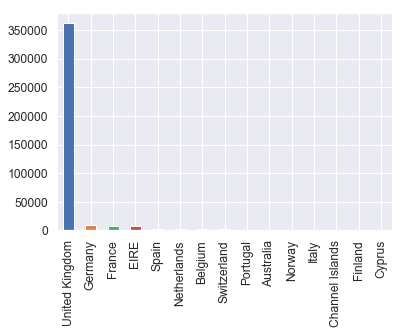

In [310]:
df.Country.value_counts()[:15].plot(kind='bar')

In [312]:
#Findinout the customers that have returned items with the return count
negativequantity = df[df['Quantity']<0]
negativequantity['Customer ID'].value_counts()

14911.0    226
17841.0    136
17511.0    113
15311.0    112
12607.0    101
14410.0     93
13798.0     90
14606.0     82
13113.0     79
12471.0     71
14680.0     62
12415.0     62
12472.0     52
12709.0     49
12748.0     46
13534.0     46
16801.0     45
13069.0     45
15005.0     41
15514.0     40
14426.0     40
13089.0     39
14534.0     39
14527.0     39
15502.0     39
15365.0     37
16717.0     37
14146.0     35
14543.0     35
13081.0     33
          ... 
13473.0      1
12451.0      1
13717.0      1
13501.0      1
17159.0      1
17747.0      1
17870.0      1
13519.0      1
18277.0      1
16358.0      1
14111.0      1
17014.0      1
17531.0      1
12365.0      1
12493.0      1
18269.0      1
16454.0      1
17979.0      1
15467.0      1
14038.0      1
12865.0      1
16086.0      1
14401.0      1
15996.0      1
17239.0      1
15781.0      1
16725.0      1
13008.0      1
14060.0      1
14869.0      1
Name: Customer ID, Length: 1589, dtype: int64

### Cleaning Data

In [12]:
#Removing records were customerID is null
df.dropna(axis=0, subset=['Customer ID'], inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        406830 non-null object
StockCode      406830 non-null object
Description    406830 non-null object
Quantity       406830 non-null int64
InvoiceDate    406830 non-null object
Price          406830 non-null float64
Customer ID    406830 non-null float64
Country        406830 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [311]:
df.drop(columns=['StockCode','Description']).head()

,Invoice,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_month,Cohort_Month,Cohort_month,CohortIndex,Amount
0,536365,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,15.30
1,536365,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,20.34
2,536365,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,22.00
3,536365,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,20.34
4,536365,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,20.34


# RFM analysis
### For Recency, Calculate the number of days between present date and date of last purchase each customer.
### For Frequency, Calculate the number of orders for each customer.
### For Monetary, Calculate sum of purchase price for each customer

In [ ]:
df['Amount'] = df['Quantity'] * df['Price']

In [234]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head()

0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [235]:
def get_month(t):
    return datetime.datetime(t.year, t.month,1)
df['Invoice_month']=df['InvoiceDate'].apply(get_month)
df['Invoice_month'].head()

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: Invoice_month, dtype: datetime64[ns]

In [295]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2010-01-12 08:26:00'), Timestamp('2011-12-10 17:19:00'))

In [303]:
present = datetime.datetime(2011,12,10)
rfm= df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (present - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'Amount': lambda price: price.sum()})
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
InvoiceDate    4372 non-null int64
Invoice        4372 non-null int64
Amount         4372 non-null float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [306]:
rfm.columns=['recency','frequency','monetary']
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,325,2,0.00
12347.0,39,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [ ]:
#Computing Quantile of RFM values
#qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. 
#For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [307]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])                
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346.0,325,2,0.00,4,4,4
12347.0,39,182,4310.00,2,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,1,2,1
12350.0,310,17,334.40,4,4,3


In [308]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
Customer ID,,,,,,,
12346.0,325,2,0.00,4,4,4,444
12347.0,39,182,4310.00,2,1,1,211
12348.0,75,31,1797.24,3,3,1,331
12349.0,18,73,1757.55,1,2,1,121
12350.0,310,17,334.40,4,4,3,443


In [309]:
# Filter out Top/Best cusotmers
#Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
Customer ID,,,,,,,
14646.0,1,2085,279489.02,1,1,1,111
18102.0,11,433,256438.49,1,1,1,111
17450.0,2,351,187482.17,1,1,1,111
14911.0,-1,5903,132572.62,1,1,1,111
14156.0,-1,1420,113384.14,1,1,1,111


## Cohort Analysis

In [270]:
#Creating a groupby object with customer ID over 'Invoice_month' column
grouping=df.groupby('Customer ID')['Invoice_month']
#Creating a 'CohortMonth' column to provide the min Invoicemonth value to each customer, which tells the month and year of first purchase
df['Cohort_month']=grouping.transform('min')
df['Cohort_month'].head()

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: Cohort_month, dtype: datetime64[ns]

In [237]:
invoiceyear= df['Invoice_month'].apply(lambda t: t.year)
invoicemonth= df['Invoice_month'].apply(lambda t: t.month)
cohortyear= df['Cohort_month'].apply(lambda t: t.year)
cohortmonth= df['Cohort_month'].apply(lambda t: t.month)
invoiceyear.head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Invoice_month, dtype: int64

In [286]:
# For every customer,calculating the number of months between any transaction and the first transaction
years_diff=invoiceyear - cohortyear
month_diff=invoicemonth - cohortmonth

df['CohortIndex']=years_diff*12+month_diff+1
#+1 so that the first month is marked as 1 for easier interpretation

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_month,Cohort_Month,Cohort_month,CohortIndex,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,10-01-01,1,20.34


In [289]:
#Counting monthly active customer from each cohort
grouping=df.groupby(['Cohort_month','CohortIndex'])
cohort_data=grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index='Cohort_month',
                               columns='CohortIndex',
                               values='Customer ID')


In [290]:
#Cohort metrics
#Retention rate metric measures how many customers from each of the cohort have returned the subsequent months.
#Retention rate is a ratio of active customers out of total customers in the cohort
cohort_sizes=cohort_counts.iloc[:,0]                            # taking the first column from the cohort_counts as cohort_sizes
retention=cohort_counts.divide(cohort_sizes,axis=0)            #Dividing all values in the cohort_counts tables by cohort_sizes along the row axis

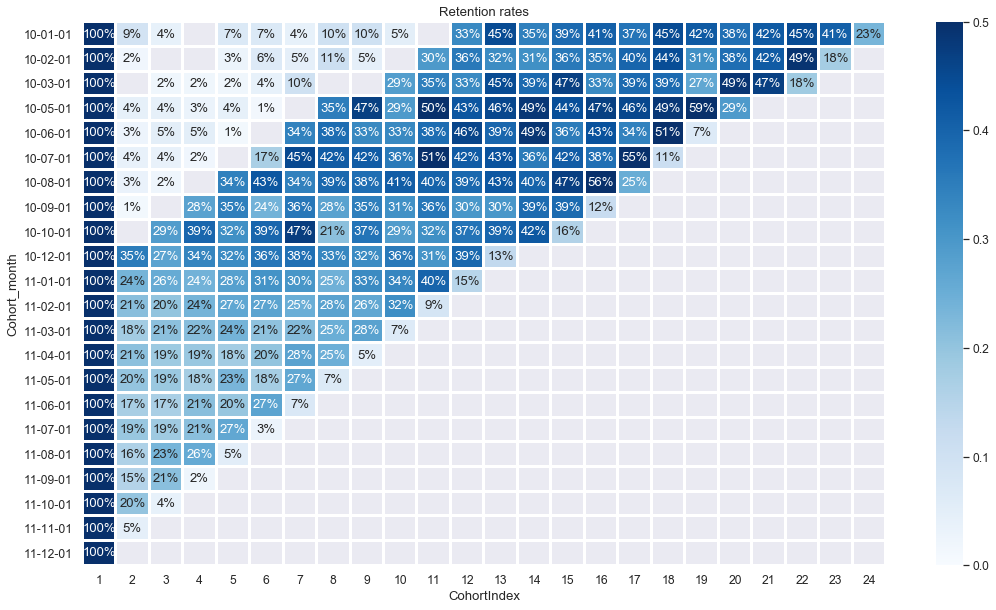

In [293]:
plt.figure(figsize=(18,10))
ax=sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap='Blues',
           linewidths=2
           )


plt.title('Retention rates')
sns.set(font_scale=1.1)
plt.show()

In [291]:
#Calculate the average purchase metric

grouping=df.groupby(['Cohort_month','CohortIndex'])
cohort_data=grouping['Quantity'].mean()
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='Cohort_month',
                                  columns='CohortIndex',
                                  values='Quantity')


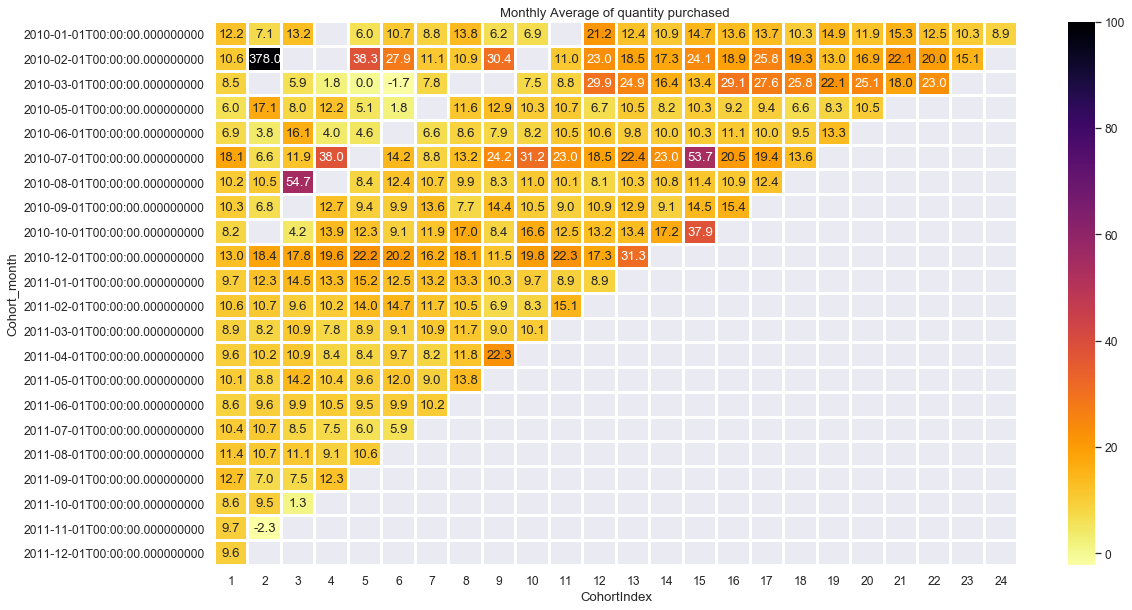

In [272]:
plt.figure(figsize=(18,10))
ax=sns.heatmap(data=average_quantity,
           annot=True,
            fmt='.1f',
            vmax=100,
           cmap='inferno_r',
           linewidths=2
           )

plt.title('Monthly Average of quantity purchased ')
sns.set(font_scale=1.1)
plt.show()
